In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../datasets/dataset_annotation.csv")
# Ensure correct types
df['label'] = df['label'].astype(int)
df['region_length'] = df['region_seq'].apply(lambda x: len(str(x)))
df['rna_length'] = df['rna_sequence'].apply(lambda x: len(str(x)))

# Summary: label distribution
label_summary = df['label'].value_counts().rename_axis('Label').reset_index(name='Count')

# Summary: region length
region_length_summary = df['region_length'].describe().to_frame(name="Region Length Stats")

# Summary: structure type distribution
structure_distribution = df['structure_type'].value_counts().rename_axis('Structure Type').reset_index(name='Count')

# Unique ligands
unique_ligands = df['ligand'].nunique()

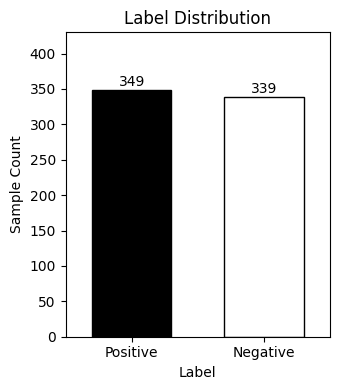

In [3]:
# Plot 1: Label distribution
label_order = [1, 0]
labels = ['Positive', 'Negative']
colors = ['black', 'white']  # fill colors
edgecolor = 'black'

label_counts = df['label'].value_counts().reindex(label_order).values
plt.figure(figsize=(3.5, 4))
bars = plt.bar(
    x=[0, 1],
    height=label_counts,
    color=colors,
    edgecolor=edgecolor,
    linewidth=1,
    width=0.6
)

for i, count in enumerate(label_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylabel("Sample Count")
plt.xlabel("Label")
plt.title("Label Distribution")
plt.ylim(0, 430)
plt.xlim(-0.5, 1.5)

plt.tight_layout()
plt.savefig('images/dataset_analysis/Label distribution.png', dpi=300)
plt.show()

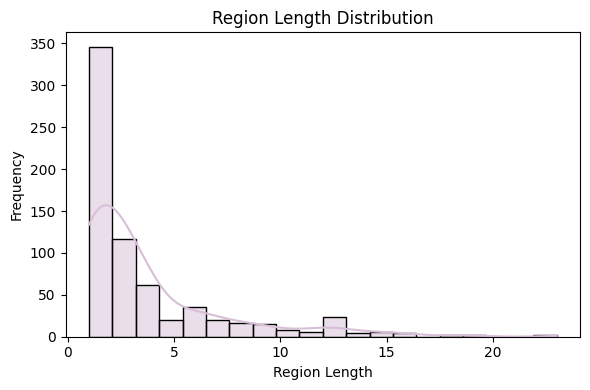

In [4]:
# Plot 2: Region length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['region_length'], bins=20, kde=True, color='#D8BFD8')
plt.title("Region Length Distribution")
plt.xlabel("Region Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('images/dataset_analysis/Region length distribution.png', dpi=300)
plt.show()

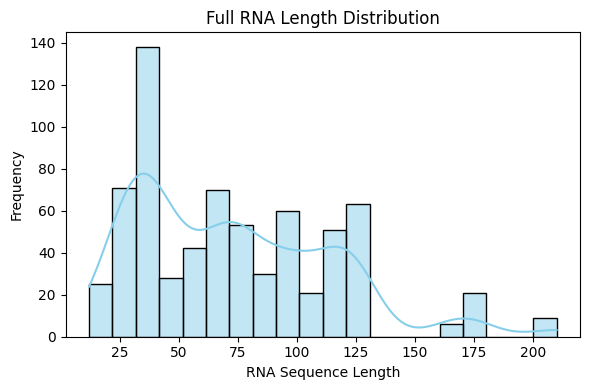

In [5]:
# Plot 3: RNA sequence length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['rna_length'], bins=20, kde=True, color='#87CEEB')
plt.title("Full RNA Length Distribution")
plt.xlabel("RNA Sequence Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('images/dataset_analysis/RNA sequence length distribution.png', dpi=300)
plt.show()

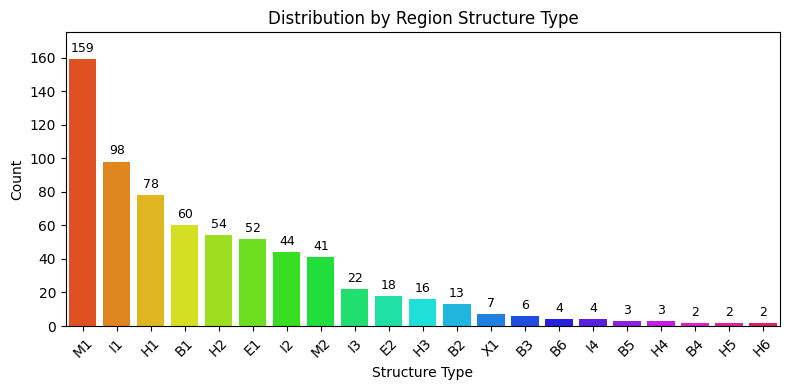

In [6]:
# Plot 4: Structure type distribution
# Sort structure types for consistent plotting
structure_distribution_sorted = structure_distribution.sort_values('Count', ascending=False)

# Generate a rainbow-like color palette with transparency
num_types = len(structure_distribution_sorted)
colors = sns.color_palette("hsv", num_types)
transparent_colors = [(r, g, b, 0.7) for r, g, b in colors]

plt.figure(figsize=(8, 4))
bars = sns.barplot(
    data=structure_distribution_sorted,
    x='Structure Type',
    y='Count',
    palette=transparent_colors
)

# Annotate counts above bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9)

plt.title("Distribution by Region Structure Type")
plt.xticks(rotation=45)
plt.ylim(0, 175)
plt.ylabel("Count")
plt.xlabel("Structure Type")
plt.tight_layout()
plt.savefig('images/dataset_analysis/Structure type distribution.png', dpi=300)
plt.show()